In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [2]:
# Load dataset
df = pd.read_csv("LSTM-Multivariate_pollution.csv")
# Replace 'your_dataset.csv' with your actual dataset file path

In [3]:
df

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...
43795,2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43796,2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43797,2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43798,2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

Epoch 1/50


c:\Users\ARJUN KAPADIA\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


487/487 - 2s - 4ms/step - loss: 15390.2461 - val_loss: 13483.1357
Epoch 2/50
487/487 - 1s - 2ms/step - loss: 11445.9531 - val_loss: 10821.5283
Epoch 3/50
487/487 - 1s - 2ms/step - loss: 9688.1504 - val_loss: 9640.1992
Epoch 4/50
487/487 - 1s - 2ms/step - loss: 8892.9453 - val_loss: 9094.1338
Epoch 5/50
487/487 - 1s - 2ms/step - loss: 8548.2637 - val_loss: 8862.0635
Epoch 6/50
487/487 - 1s - 2ms/step - loss: 8400.8555 - val_loss: 8737.3545
Epoch 7/50
487/487 - 1s - 2ms/step - loss: 8191.1445 - val_loss: 8409.3574
Epoch 8/50
487/487 - 1s - 1ms/step - loss: 7863.7998 - val_loss: 8110.5068
Epoch 9/50
487/487 - 1s - 1ms/step - loss: 7602.9536 - val_loss: 7871.4961
Epoch 10/50
487/487 - 1s - 1ms/step - loss: 7382.3564 - val_loss: 7653.4053
Epoch 11/50
487/487 - 1s - 1ms/step - loss: 7191.6401 - val_loss: 7475.9722
Epoch 12/50
487/487 - 1s - 1ms/step - loss: 7033.9487 - val_loss: 7335.7944
Epoch 13/50
487/487 - 1s - 1ms/step - loss: 6904.9648 - val_loss: 7219.0649
Epoch 14/50
487/487 - 1s - 1

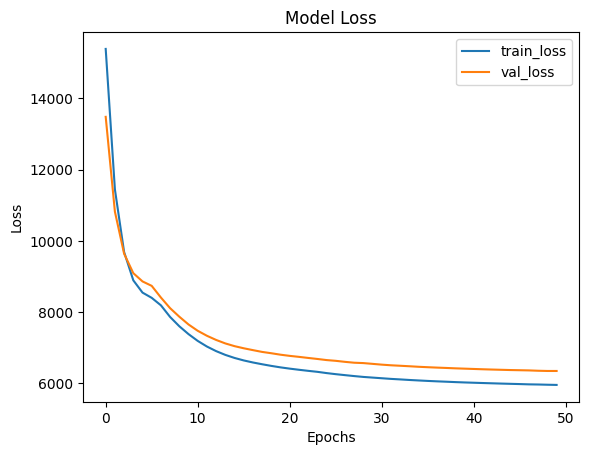

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load dataset
df = pd.read_csv("C:\\Users\\ARJUN KAPADIA\\Downloads\\archive (18)\LSTM-Multivariate_pollution.csv")  # Replace 'your_dataset.csv' with your actual dataset file path

# Preprocess data
# Assuming 'date' column is already in a datetime format, no conversion needed

# Encode categorical variable 'wnd_dir'
encoder = LabelEncoder()
df['wnd_dir_encoded'] = encoder.fit_transform(df['wnd_dir'])

# Drop original 'wnd_dir' column
df.drop('wnd_dir', axis=1, inplace=True)

# Split into features and target
X = df.drop(['date', 'pollution'], axis=1)  # Features (excluding 'date' and 'pollution')
y = df['pollution']  # Target variable

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train LSTM model
history = model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_test, y_test), verbose=2)

# Visualize loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [6]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(100))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), verbose=2)


Epoch 1/100


c:\Users\ARJUN KAPADIA\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


274/274 - 4s - 13ms/step - loss: 10472.3496 - val_loss: 8458.9902
Epoch 2/100
274/274 - 1s - 4ms/step - loss: 7717.3872 - val_loss: 7642.2310
Epoch 3/100
274/274 - 1s - 4ms/step - loss: 6779.2275 - val_loss: 6883.8975
Epoch 4/100
274/274 - 1s - 4ms/step - loss: 6426.1680 - val_loss: 6691.6655
Epoch 5/100
274/274 - 1s - 4ms/step - loss: 6213.0254 - val_loss: 6522.1655
Epoch 6/100
274/274 - 1s - 4ms/step - loss: 6111.1294 - val_loss: 6504.5288
Epoch 7/100
274/274 - 1s - 4ms/step - loss: 6069.7861 - val_loss: 6443.0283
Epoch 8/100
274/274 - 1s - 4ms/step - loss: 6028.5435 - val_loss: 6383.2778
Epoch 9/100
274/274 - 1s - 4ms/step - loss: 5994.9048 - val_loss: 6352.2637
Epoch 10/100
274/274 - 1s - 4ms/step - loss: 5967.7354 - val_loss: 6327.1309
Epoch 11/100
274/274 - 1s - 4ms/step - loss: 5941.0093 - val_loss: 6314.7852
Epoch 12/100
274/274 - 1s - 4ms/step - loss: 5941.4419 - val_loss: 6308.1299
Epoch 13/100
274/274 - 1s - 4ms/step - loss: 5924.2412 - val_loss: 6296.0527
Epoch 14/100
274/2